In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('C:\\Users\\bagchi\\Downloads\\ex1data.txt', header = None, names = ['Population', 'Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [30]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [31]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
Population,6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,...,6.00200,5.5204,5.0594,5.7077,7.6366,5.8707,5.3054,8.29340,13.3940,5.43690
Profit,17.5920,9.1302,13.6620,11.8540,6.8233,11.8860,4.3483,12.0000,6.5987,3.8166,...,0.92695,0.1520,2.8214,1.8451,4.2959,7.2029,1.9869,0.14454,9.0551,0.61705


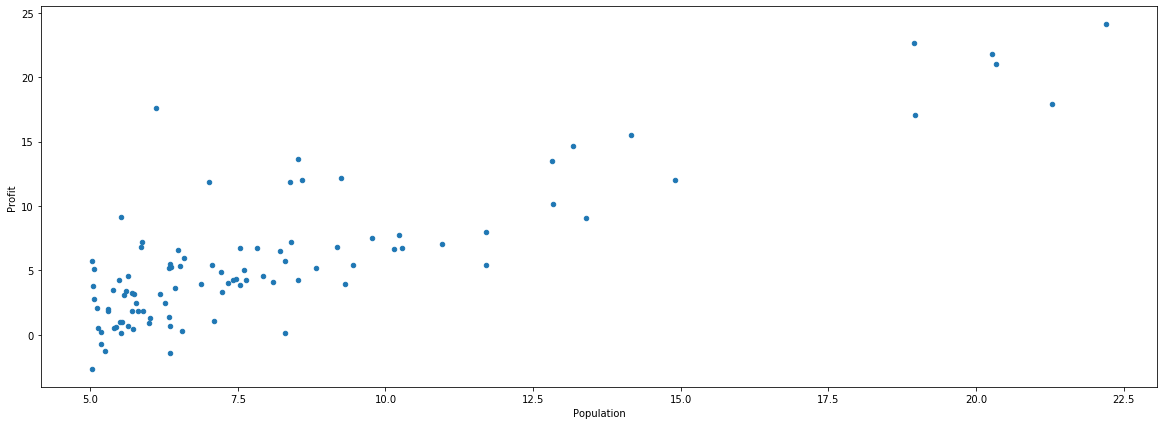

In [32]:
df.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize = (20,7))

In [33]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

In [34]:
df.insert(0, 'Ones', 1)
df.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [35]:
cols = df.shape[1]

X = df.iloc[:, 0:cols-1]
y = df.iloc[:, cols-1:cols]

In [36]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

theta

matrix([[0, 0]])

In [37]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [38]:
computeCost(X, y, theta)

32.072733877455676

In [39]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)
    for i in range(iters):
        error = (X * theta.T) - y
        
        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        for j in range(parameters):
            term  = np.multiply(error, X[:, j])
            temp[0,j] = theta[0,j] -((alpha / len(X)) * np.sum(term))
          
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

alpha = 0.01
iters = 1000
# perform gradient descent to fit the model parameters and compute the cost
g, cost = gradientDescent(X, y, theta, alpha, iters)
print(g)
print(cost)

[[-3.24140214  1.1272942 ]]
[6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257 5.67396548 5.66965398 5.665358   5.6610775
 5.65681242 5.6525627  5.64832829 5.64410913 5.63990517 5.63571635
 5.63154261 5.62738391 5.6232402  5.6191114  5.61499748 5.61089837
 5.60681403 5.60274441 5.59868944 5.59464907 5.59062326 5.58661195
 5.58261509 5.57863263 5.57466451 5.57071068 5.56677109 5.5628457
 5.55893444 5.55503727 5.55115414 5.547285   5.54342979 5.53958847
 5.53576098 5.53194728 5.52814732 5.

In [40]:
computeCost(X, y, g)

4.515955503078912

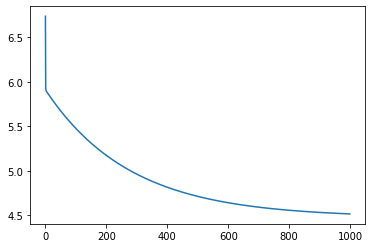

In [41]:
plt.plot(cost)